In [29]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
students = pd.read_csv('D:\Костя\Downloads\StudentsPerformance.csv')
PupLup = pd.read_csv('D:\Костя\Downloads\PupLup.csv')
Dota = pd.read_csv('D:\Костя\Downloads\dota_hero_stats.csv')
ds = pd.read_csv('D:\Костя\Downloads\dataset_209770_6.txt', sep = ' ')
iris = pd.read_csv('D:\Костя\Downloads\iris.csv')
my_stat = pd.read_csv('D:\Костя\Downloads\my_stat.csv')
my_stat_1 = pd.read_csv('D:\Костя\Downloads\my_stat_1.csv')
pets = pd.read_csv('D:\Костя\Downloads\cats.csv')
Pets = pd.read_csv('D:\Костя\Downloads\Pet.csv')
X_pred = pd.read_json('D:\Костя\Downloads\dataset_209691_15.txt')
Pets

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [55]:
PupLup.groupby(['Type', 'Executor']).aggregate({'Salary': 'mean'})

Salary
Type Executor            
A    Loopa      58.000000
     Pupa      160.833333
B    Loopa     145.166667
     Pupa       77.000000
C    Loopa     154.333333
     Pupa       74.500000
D    Loopa     137.714286
     Pupa      146.500000
E    Loopa     164.000000
     Pupa      131.200000
F    Loopa     238.000000
     Pupa      136.250000

In [15]:
Dota.groupby(['attack_type', 'primary_attr']).aggregate({'legs': 'count'})

legs
attack_type primary_attr      
Melee       agi             19
            int              2
            str             35
Ranged      agi             18
            int             40
            str              3

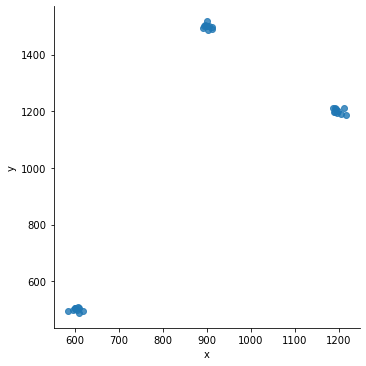

In [20]:
#необходимо посчитать число кластеров, формируемых наблюдениями
sb.lmplot(x = 'x', y = 'y', data = ds, fit_reg = False)
#Ответ 3

<ipython-input-53-0cb506e3f064>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series([])


<AxesSubplot:>

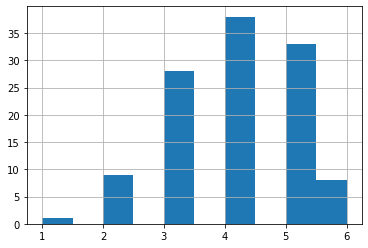

In [53]:
#Скачайте датасэт с данными о героях из игры dota 2 
#и посмотрите на распределение их возможных ролей в игре (колонка roles). 
#Постройте гистограмму, отражающую скольким героям сколько ролей приписывается 
s = pd.Series([])
count_str = Dota.shape[0]
for i in range(count_str):
    count = len(Dota.roles[i].split(', '))
    s[len(s)] = count
s.hist()

In [62]:
iris

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='sepal length', ylabel='Density'>

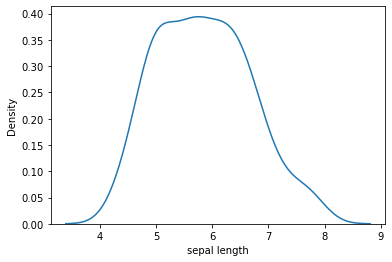

In [70]:
#гистограмма + график плотности распределения
#sb.distplot(iris['sepal length'])
#только график плотности распределения
sb.kdeplot(iris['sepal length'])

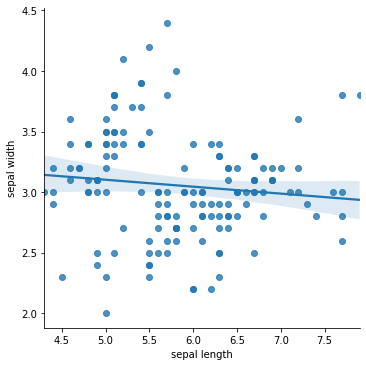

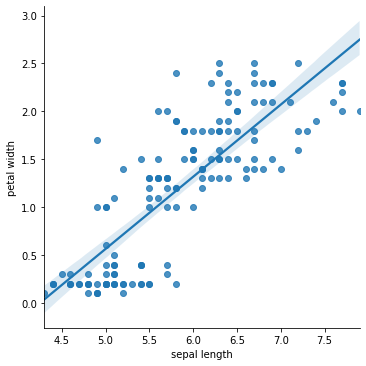

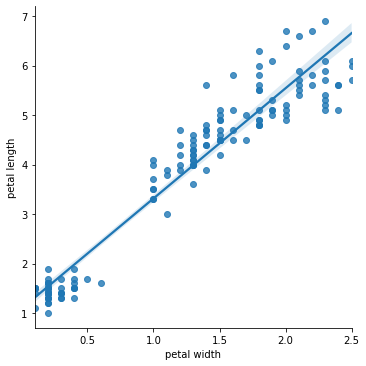

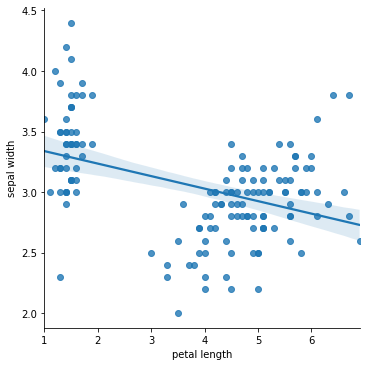

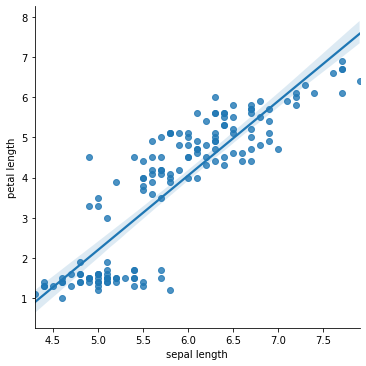

In [77]:
#Какая из пар навскидку имеет наибольшую корреляцию?
sb.lmplot(x = 'sepal length', y = 'sepal width', data = iris)
sb.lmplot(x = 'sepal length', y = 'petal width', data = iris)
sb.lmplot(x = 'petal width', y = 'petal length', data = iris)
sb.lmplot(x = 'petal length', y = 'sepal width', data = iris)
sb.lmplot(x = 'sepal length', y = 'petal length', data = iris)


In [96]:
subset_1 = my_stat.iloc[:10, [1, 3]]
subset_1
my_stat.iloc[:, [1, 3]].drop([0, 4], axis = 0)
#my_stat

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [ ]:
substet_1 = my_stat.query("V1 > 1 & V3 == 'A'")
substet_2 = my_stat.query("V2 != 10 | V4 >= 1")

In [101]:
my_stat_1

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [133]:
without_negative = my_stat_1.query("n_users >= 0.0")
median = without_negative.n_users.median()
#size = my_stat_1.shape[0]
#for i in range(size):
    #if my_stat_1.n_users[i] < 0:
        #my_stat_1.n_users[i] = float(median)
my_stat_1.loc[my_stat_1.n_users < 0, 'n_users'] = median
my_stat_1.fillna(0)



,session_value,time,group,n_users
0,0.0,12,B,9
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


[Text(167.4, 163.07999999999998, 'X[1] <= 11.8\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

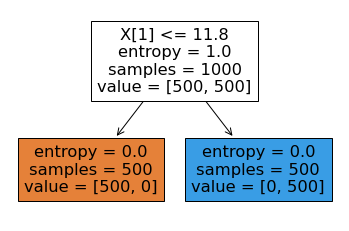

In [30]:
Pets = pd.read_csv('D:\Костя\Downloads\Pet.csv')
X_pred = pd.read_json('D:\Костя\Downloads\dataset_209691_15.txt')

X_train = Pets.drop(columns = 'Вид')
Y_train = Pets['Вид'].map({'собачка': 1, 'котик': 0}) 

clf = DecisionTreeClassifier(criterion  = 'entropy', max_depth = 7)
clf.fit(X_train, Y_train)
plot_tree(clf, filled=True)
#list(clf.predict(X_pred)).count(1)

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

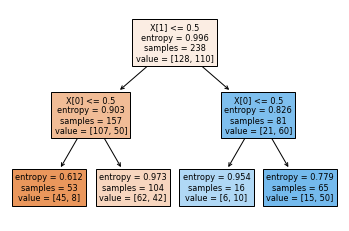

In [33]:
data_train = pd.read_csv('D:\Костя\Downloads\TreeMed.csv')
X_train = data_train.drop(columns = 'num')
Y_train = data_train.num
clf = DecisionTreeClassifier(criterion  = 'entropy')
clf.fit(X_train, Y_train)
plot_tree(clf, filled = True)

In [46]:
sumbits = pd.read_csv('D:\Костя\Downloads\SubMit.csv')
top = sumbits.query("submission_status == 'wrong'").sort_values('timestamp', ascending = False).groupby('user_id').head(1)
top.groupby('step_id').aggregate({'user_id': 'count'}).sort_values('user_id', ascending = False)

,user_id
step_id,
32812,867
31978,697
33669,402
31971,305
31972,294
...,...
31988,10
33674,9
33413,9
